1. 시작 연도부터 끝나는 연도년까지 대구 기온 데이터에서 특정 월의 최고 기온 및 최저 기
온의 평균값을 구하고 그래프로 표현 하시오.

n daegu_utf8.csv 파일 이용
n 데이터 구조
['날짜', '지점', '평균기온', '최저기온', '최고기온’]
[0] [1] [2] [3] [4]
n 화면에서 측정할 달을 입력받아서 진행
n 해당 기간 동안 최고기온 평균값 및 최저기온 평균값 계산
- 최고기온 및 최저기온 데이터를 이용하여 입력된 달의 각각 평균값을 구함
- 문자열 형태의 ‘날짜’ 열의 데이터는 datetime으로 변경함:
n 하나의 그래프 안에 2개의 꺾은선 그래프로 결과를 출력
- 마이너스 기호 출력 깨짐 방지
- 입력된 월을 이용하여 그래프의 타이틀 내용 변경
- 최고 온도는 빨간색, 최저 온도는 파란색으로 표시하고 각각 마커 및 legend를 표시
- 다른 운영체제에서도 동작할 수 있도록 platform 모듈을 사용하여 운영체제를
구분하여 한글 폰트 지정할 것

In [37]:
import pandas as pd
import numpy as np
import csv
FILENAME = 'daegu_utf8.csv'
df = pd.read_csv(FILENAME)
df

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0
...,...,...,...,...,...
41445,2022-06-26,143,28.4,24.4,32.8
41446,2022-06-27,143,27.3,25.4,30.1
41447,2022-06-28,143,28.9,24.8,32.3
41448,2022-06-29,143,29.5,27.7,33.7


In [38]:
# 운영체제 플랫폼 구별 및 한글 폰트 설정
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

system_name = platform.system()
if system_name == 'Windows':
    print('Windows OS')
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    print('Mac OS')
    plt.rc('font', family= 'AppleGothic')
elif system_name == 'Linux':
    print('Linux OS')
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print('Not Support')

Windows OS


In [39]:
df['날짜'] = pd.to_datetime(df['날짜'])

실행결과
1991년부터 2012년까지 5월의 기온 변화

12월 최저기온 평균: 
12.6, 11.8, 12.6, 13.5, 12.0, 13.1, 13.9, 14.6, 13.7, 14.2, 15.5, 13.3, 13.1, 14.7, 13.8, 14.2, 14.3, 14.2, 15.1, 13.7, 13.8, 15.1, 
12월 최고기온 평균: 
24.5, 24.1, 25.3, 25.3, 24.9, 26.1, 25.9, 25.4, 25.4, 25.1, 25.8, 24.0, 24.1, 24.4, 25.9, 24.3, 26.3, 25.7, 27.7, 25.3, 24.2, 26.2, 

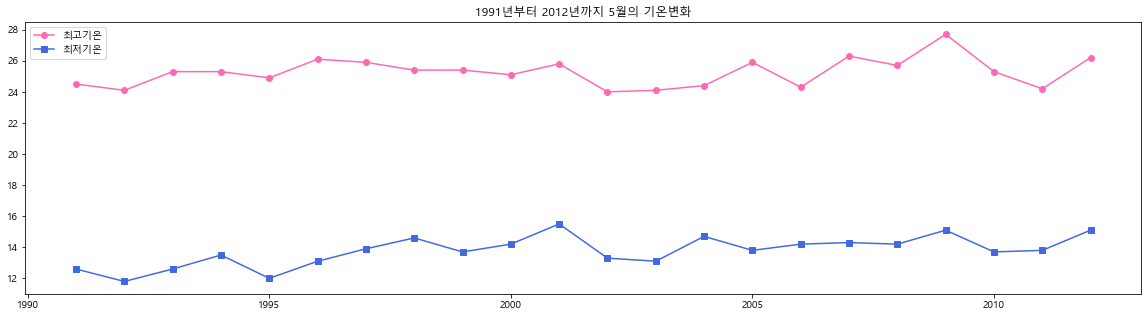

In [72]:
def month_mean():
    start = input("시작 연도를 입력하세요: ")
    end = input("마지막 연도를 입력하세요: ")
    month = input("기온 변화를 측정할 달을 입력하세요: ")
    cond1 = df['날짜'].dt.year >= int(start)
    cond2 = df['날짜'].dt.year <= int(end)
    cond3 = df['날짜'].dt.month == int(month)
    cond_df = df[cond1 & cond2 & cond3].copy()
    cond_df['연'] = cond_df['날짜'].dt.year
    high = cond_df.groupby('연')['최고기온'].mean().round(1)
    low = cond_df.groupby('연')['최저기온'].mean().round(1)


    print('실행결과')
    print(f'{start}년부터 {end}년까지 {month}월의 기온 변화')
    print()
    print('12월 최저기온 평균: ')
    for i in low:
        print(i, end=', ')
    print()
    print('12월 최고기온 평균: ')
    for i in high:
        print(i, end=', ')

    plt.figure(figsize=(20,5))
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('font', family= 'Malgun Gothic')
    plt.plot(high.index, high,'hotpink', marker='o', label='최고기온')
    plt.plot(high.index, low,'royalblue', marker='s', label='최저기온')
    plt.title(f'{start}년부터 {end}년까지 {month}월의 기온변화')
    plt.legend()
    plt.show()

month_mean()
# ex) 1991 2012 12 순서대로 입력 -> 1991년부터 2012년까지 12월의 기온변화 그래프 출력


실행결과
1991년부터 2012년까지 5월의 기온 변화

12월 최저기온 평균: 
12.6, 11.8, 12.6, 13.5, 12.0, 13.1, 13.9, 14.6, 13.7, 14.2, 15.5, 13.3, 13.1, 14.7, 13.8, 14.2, 14.3, 14.2, 15.1, 13.7, 13.8, 15.1, 
12월 최고기온 평균: 
24.5, 24.1, 25.3, 25.3, 24.9, 26.1, 25.9, 25.4, 25.4, 25.1, 25.8, 24.0, 24.1, 24.4, 25.9, 24.3, 26.3, 25.7, 27.7, 25.3, 24.2, 26.2, 

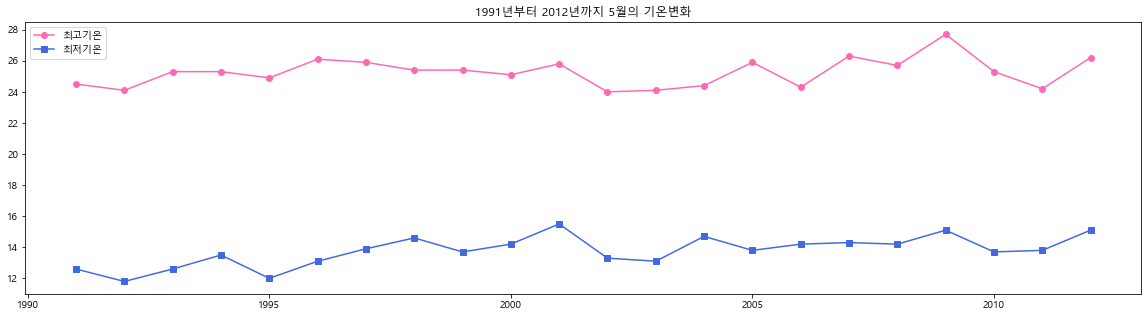

In [71]:
import csv

def month_mean2():
    start = input("시작 연도를 입력하세요: ")
    end = input("마지막 연도를 입력하세요: ")
    month = input("기온 변화를 측정할 달을 입력하세요: ")

    max_record = []
    min_record = []
    x_year = []
    for i in range(int(start), int(end)+1):
        temp = []
        temp2 = []
        f = open('daegu_utf8.csv', 'r', encoding='utf-8')
        data = csv.reader(f)
        next(data)
        for row in data:
            year, mon, day = row[0].split('-')
            if (int(year) == int(i)) & (int(mon) == int(month)):
                temp.append(float(row[-1]))
                temp2.append(float(row[-2]))
        f.close()
        max_record.append(round(sum(temp)/ len(temp), 1))
        min_record.append(round(sum(temp2)/ len(temp2), 1))
        x_year.append(i)
    # print(f'최고: {max_record}')
    # print(f'최저: {min_record}')
    # print(x_year)
    print('실행결과')
    print(f'{start}년부터 {end}년까지 {month}월의 기온 변화')
    print()
    print('12월 최저기온 평균: ')
    for i in min_record:
        print(i, end=', ')
    print()
    print('12월 최고기온 평균: ')
    for i in max_record:
        print(i, end=', ')

    plt.figure(figsize=(20,5))
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('font', family= 'Malgun Gothic')
    plt.plot(x_year, max_record,'hotpink', marker='o', label='최고기온')
    plt.plot(x_year, min_record,'royalblue', marker='s', label='최저기온')
    plt.title(f'{start}년부터 {end}년까지 {month}월의 기온변화')
    plt.legend()
    plt.show()


month_mean2()


  
    

[31.3, 26.3, 19.5, 18.8, 16.8, 26.0, 28.6, 27.2, 31.3, 23.0, 17.8, 28.6, 23.6, 20.0, 18.2, 30.8, 20.9, 26.9, 24.2, 27.2, 21.1, 30.2, 30.1, 29.5, 22.9, 24.4, 25.0, 28.2, 29.3, 27.0, 29.4]
실행결과
1991년부터 2012년까지 5월의 기온 변화

12월 최저기온 평균: 
24.535483870967738, 24.122580645161293, 25.283870967741926, 25.29354838709677, 24.89677419354838, 26.13548387096774, 25.896774193548385, 25.351612903225806, 25.43225806451612, 25.112903225806452, 25.767741935483876, 23.996774193548383, 24.077419354838714, 24.406451612903226, 25.900000000000006, 24.309677419354834, 26.290322580645167, 25.712903225806453, 27.690322580645162, 25.3, 24.219354838709677, 26.154838709677417, 
12월 최고기온 평균: 
12.648387096774195, 11.848387096774195, 12.625806451612904, 13.467741935483867, 12.009677419354837, 13.148387096774195, 13.916129032258068, 14.574193548387099, 13.658064516129029, 14.199999999999998, 15.496774193548385, 13.306451612903228, 13.13225806451613, 14.74193548387097, 13.83225806451613, 14.216129032258065, 14.3322580645

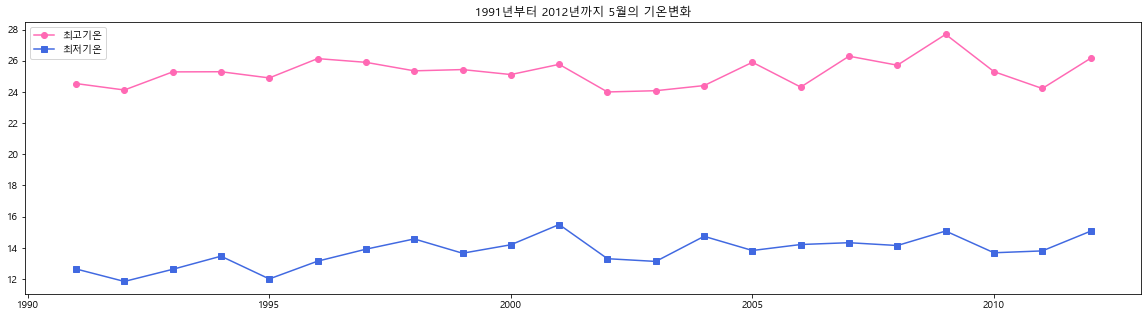

In [70]:
import csv

def month_mean3():
    start = input("시작 연도를 입력하세요: ")
    end = input("마지막 연도를 입력하세요: ")
    month = input("기온 변화를 측정할 달을 입력하세요: ")

    f = open('daegu_utf8.csv', 'r', encoding='utf-8')
    data = csv.reader(f)
    next(data)
    max_record = []; min_record = []
    for i in range(1+ int(end)- int(start)):
        max_record.append([])
        min_record.append([])
   
    for row in data:
        year, mon, day = row[0].split('-')
        if (int(year) >= int(start)) & (int(year) <= int(end)) & (int(mon) == int(month)):
            max_record[int(year)-int(start)].append(float(row[-1]))
            min_record[int(year)-int(start)].append(float(row[-2]))
    f.close()
    print(max_record[3])

    high = []
    low = []
    x_year = []
    for idx, yearlist in enumerate(max_record):
        high.append(sum(yearlist) / len(yearlist))
        x_year.append(int(start)+idx)
    for yearlist in min_record:
        low.append(sum(yearlist) / len(yearlist))
    # print(f'최고: {high}')
    # print(f'최저: {low}')
    # print(x_year)
    print('실행결과')
    print(f'{start}년부터 {end}년까지 {month}월의 기온 변화')
    print()
    print('12월 최저기온 평균: ')
    for i in high:
        print(i, end=', ')
    print()
    print('12월 최고기온 평균: ')
    for i in low:
        print(i, end=', ')

    plt.figure(figsize=(20,5))
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('font', family= 'Malgun Gothic')
    plt.plot(x_year, high,'hotpink', marker='o', label='최고기온')
    plt.plot(x_year, low,'royalblue', marker='s', label='최저기온')
    plt.title(f'{start}년부터 {end}년까지 {month}월의 기온변화')
    plt.legend()
    plt.show()

month_mean3()

실행결과
1991년부터 2012년까지 5월의 기온 변화

12월 최저기온 평균: 
24.535483870967738, 24.122580645161293, 25.283870967741926, 25.29354838709677, 24.89677419354838, 26.13548387096774, 25.896774193548385, 25.351612903225806, 25.43225806451612, 25.112903225806452, 25.767741935483876, 23.996774193548383, 24.077419354838714, 24.406451612903226, 25.900000000000006, 24.309677419354834, 26.290322580645167, 25.712903225806453, 27.690322580645162, 25.3, 24.219354838709677, 26.154838709677417, 
12월 최고기온 평균: 
12.648387096774195, 11.848387096774195, 12.625806451612904, 13.467741935483867, 12.009677419354837, 13.148387096774195, 13.916129032258068, 14.574193548387099, 13.658064516129029, 14.199999999999998, 15.496774193548385, 13.306451612903228, 13.13225806451613, 14.74193548387097, 13.83225806451613, 14.216129032258065, 14.332258064516132, 14.151612903225804, 15.080645161290322, 13.687096774193547, 13.806451612903226, 15.070967741935481, 

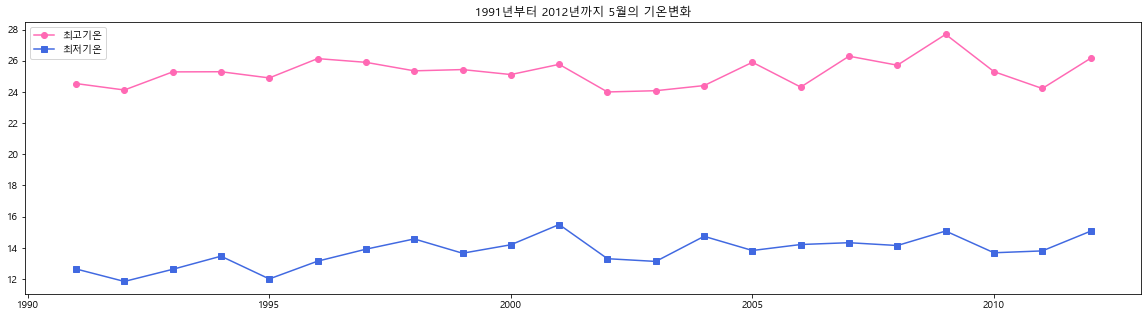

In [69]:
import csv

def month_mean4():
    start = input("시작 연도를 입력하세요: ")
    end = input("마지막 연도를 입력하세요: ")
    month = input("기온 변화를 측정할 달을 입력하세요: ")

    f = open('daegu_utf8.csv', 'r', encoding='utf-8')
    data = csv.reader(f)
    next(data)
    record = []; count = 0
    for i in range(1+ int(end)- int(start)):
        record.append([0,0])
      
   
    for row in data:
        year, mon, day = row[0].split('-')
        if (int(year) >= int(start)) & (int(year) <= int(end)) & (int(mon) == int(month)):
            record[int(year)-int(start)][0] += float(row[-1])
            record[int(year)-int(start)][1] += float(row[-2])
            count += 1
    f.close()

    x_year = [idx+int(start) for idx, yearlist in enumerate(record)]
    value = count / len(x_year)
    
    high = [yearlist[0]/value for yearlist in record]
    low = [yearlist[1]/value for yearlist in record]
    
    
    # print(f'최고: {high}')
    # print(f'최저: {low}')
    # print(x_year)
    print('실행결과')
    print(f'{start}년부터 {end}년까지 {month}월의 기온 변화')
    print()
    print('12월 최저기온 평균: ')
    for i in high:
        print(i, end=', ')
    print()
    print('12월 최고기온 평균: ')
    for i in low:
        print(i, end=', ')

    plt.figure(figsize=(20,5))
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('font', family= 'Malgun Gothic')
    plt.plot(x_year, high,'hotpink', marker='o', label='최고기온')
    plt.plot(x_year, low,'royalblue', marker='s', label='최저기온')
    plt.title(f'{start}년부터 {end}년까지 {month}월의 기온변화')
    plt.legend()
    plt.show()

month_mean4()